In [1]:
vlib = c("tidyverse", "ggpubr", "patchwork", "ggsci", "viridis",
         "enrichR", "survival", "survminer", "arrow", "ggpmisc", 
         "Seurat", "tidyseurat", "hdWGCNA")
lapply(vlib, require, character.only = TRUE, quietly = TRUE) |> suppressMessages()

base_dir = "../analysis"

setwd(base_dir)

saveRDS.gz <- function(object, file, threads=4) {
  con <- pipe(paste0("pigz -p", threads, " > ", file), "wb")
  saveRDS(object, file = con)
  close(con)
}
readRDS.gz <- function(file, threads = parallel::detectCores()) {
  con <- pipe(paste0("pigz -d -c -p", threads, " ", file))
  object <- readRDS(file = con)
  close(con)
  return(object)
}

df_meta_target = read_delim("assets/file_meta.txt",
                     col_names = c("levels", "time", "cluster_name")) %>% 
                     mutate(prefix_file = paste0(levels, "_", time, "_", cluster_name))

Warning message:
“replacing previous import ‘GenomicRanges::intersect’ by ‘SeuratObject::intersect’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘GenomicRanges::union’ by ‘dplyr::union’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘GenomicRanges::setdiff’ by ‘dplyr::setdiff’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘dplyr::as_data_frame’ by ‘igraph::as_data_frame’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘Seurat::components’ by ‘igraph::components’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘dplyr::groups’ by ‘igraph::groups’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘dplyr::union’ by ‘igraph::union’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘GenomicRanges::subtract’ by ‘magrittr::subtract’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘Matrix::as.matrix’ by ‘proxy::as.matrix’ when loading 

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

Rows: 16 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): levels, time, cluster_name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
path_map_cis = "assets/02_mashr/joined_all_results.txt.gz"
path_adj_mtx = "assets/SCENIC/adj.csv.gz"
path_compare_studies = "assets/compare_studies/unique_eGenes.txt.gz"
path_gene_modulescore = "/data/nfs_dell/project_HS/202310-sceqtl_v6/scRNA_wgcna_pipeline/kME_gene_metric/CD8.txt.gz"
df_map_cis = read_delim(path_map_cis, show_col_types = FALSE)
df_adj_mtx = read_delim(path_adj_mtx, show_col_types = FALSE)
df_gene_modulescore = read_delim(path_gene_modulescore, show_col_types = FALSE)
df_compare_studies = read_delim(path_compare_studies, show_col_types = FALSE)

In [3]:
df_map_cis %>% filter(phenotype_id == "CD244")

phenotype_id,variant_id,condition,lfsr,PosteriorMean,PosteriorSD,start_distance,af,ma_samples,ma_count,pval_nominal,slope,slope_se,prefix_file,name
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
CD244,chr1:161784413:G:GAT,anno_l1_1st_CD8,0.226329812,-0.09188988,0.12693097,921526,0.1506849,17,22,9.151981e-01,-0.01870595,0.1744042,anno_l1_1st_CD8,CD244_chr1:161784413:G:GAT
CD244,chr1:161784413:G:GAT,anno_l1_1st_Mono,0.275725127,0.09008366,0.14121881,921526,0.1506849,17,22,1.476529e-01,0.27657974,0.1867992,anno_l1_1st_Mono,CD244_chr1:161784413:G:GAT
CD244,chr1:161784413:G:GAT,anno_l1_1st_NK,0.176185423,-0.11502780,0.12807380,921526,0.1506849,17,22,3.486580e-01,-0.20445555,0.2152306,anno_l1_1st_NK,CD244_chr1:161784413:G:GAT
CD244,chr1:161784413:G:GAT,anno_l1_base_CD8,0.004770485,-0.56569321,0.22502087,921526,0.1506849,17,22,1.657513e-05,-0.92118931,0.1854308,anno_l1_base_CD8,CD244_chr1:161784413:G:GAT
CD244,chr1:161784413:G:GAT,anno_l1_base_Mono,0.484245333,0.01008276,0.12769753,921526,0.1506849,17,22,8.879716e-01,0.02873120,0.2025139,anno_l1_base_Mono,CD244_chr1:161784413:G:GAT
CD244,chr1:161784413:G:GAT,anno_l1_base_NK,0.006897971,-0.39415362,0.16786541,921526,0.1506849,17,22,2.296743e-03,-0.53779525,0.1638646,anno_l1_base_NK,CD244_chr1:161784413:G:GAT
CD244,chr1:161784413:G:GAT,anno_l1_base_Other_T,0.360265282,-0.02778451,0.08882412,921526,0.1506849,17,22,2.064266e-01,-0.25643045,0.1992998,anno_l1_base_Other_T,CD244_chr1:161784413:G:GAT


In [4]:
path_ME = "assets/wgcna/CD8_MEs.txt.gz"

In [5]:
c_brown = df_gene_modulescore %>% filter(color == "brown") %>% pull(gene_name)

In [6]:
df_MEs = read_delim("assets/wgcna/CD8_MEs.txt.gz")

Rows: 78090 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): CellID, Response, time, sample, anno_l2
dbl (11): pink, magenta, brown, black, yellow, turquoise, green, red, purple...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
seurat_obj = readRDS.gz("/data/nfs_dell/project_HS/202310-sceqtl_v6/scRNA_wgcna_pipeline/seurat_obj_wgcna_CD8.RNA_UCell.RDS")
df_md = seurat_obj@meta.data
df_md_subset = df_md %>% rownames_to_column("CellID") %>% filter(anno_l1 == "CD8")
df_md_subset = df_md_subset %>% select(CellID, sample, time, Response, anno_l1, anno_l2, anno_c1)

In [8]:
dgc_GE = seurat_obj@assays$RNA@layers$data

In [9]:
colnames(dgc_GE) = colnames(seurat_obj)
rownames(dgc_GE) = rownames(seurat_obj)

In [10]:
c_genes = c("CD244", "PRF1")

if (length(c_genes) > 1){
    df_gene = dgc_GE[c_genes,] %>% 
      t() %>% 
      as.data.frame() %>% 
      rownames_to_column("CellID")
} else if (length(c_genes) == 1) {
    df_gene = dgc_GE[c_genes,] %>% 
      as.data.frame() %>% 
      rownames_to_column("CellID")
    colnames(df_gene) = c("CellID", c_genes)
}

In [11]:
seurat_obj_subset = seurat_obj %>% filter(anno_l1 == "CD8")

In [12]:
### PRF1 - Brown analysis


library(pgenlibr)
pvar <- pgenlibr::NewPvar("/data/nfs_dell/project_HS/202310-sceqtl_v6/pseudobulk_pipeline/plink_subset/temp_plink_maf01_HWEe5_geno03_mind03.pvar")
pgen <- pgenlibr::NewPgen("/data/nfs_dell/project_HS/202310-sceqtl_v6/pseudobulk_pipeline/plink_subset/temp_plink_maf01_HWEe5_geno03_mind03.pgen",
                          pvar = pvar)
sample_id = read_delim("/data/nfs_dell/project_HS/202310-sceqtl_v6/pseudobulk_pipeline/plink_subset/temp_plink_maf01_HWEe5_geno03_mind03.psam") %>%
  pull(IID)
gtf = read_delim("assets/gencode.v43.basic.tss_bed.txt")

c_colors = c(
  "B" = "#C0392BFF",
  "CD4" = "#D35400FF", 
  "CD8" = "#F39C12FF",
  "DC" = "#27AE60FF",
  "Mono" = "#16A085FF",
  "NK" = "#2980B9FF",
  "Other" = "#8E44ADFF",
  "Other_T" = "#2C3E50FF"
)
  

Rows: 73 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): #FID, IID
dbl (1): SEX

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 59582 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): #chr, gene_id
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [13]:
# grep all variant
target_variant = df_map_cis %>% distinct(variant_id) %>% pull(variant_id)

var_id = c()
for (each in target_variant){
  var_id = append(var_id, GetVariantsById(pvar, each))
}

geno_mat <- pgenlibr::ReadList(pgen, var_id)
colnames(geno_mat) = target_variant
rownames(geno_mat) = sample_id

df_geno = geno_mat %>% 
  as.data.frame() %>% 
  rownames_to_column("sample") %>%
  pivot_longer(cols = c(2:ncol(.)), names_to = "variant_id", values_to = "allele")

In [14]:
df_geno %>% write_delim("assets/geno.txt.gz", delim = "\t")

In [14]:
df_MEs_pseudobulk = df_MEs %>% group_by(time, sample, Response) %>%
  mutate(time = factor(time, levels = c("base", "1st"))) %>%
  mutate(Response = factor(Response, levels = c("PR", "PD"))) %>%
  summarise(median_brown = median(brown)) 

`summarise()` has grouped output by 'time', 'sample'. You can override using
the `.groups` argument.


`summarise()` has grouped output by 'time', 'sample'. You can override using
the `.groups` argument.


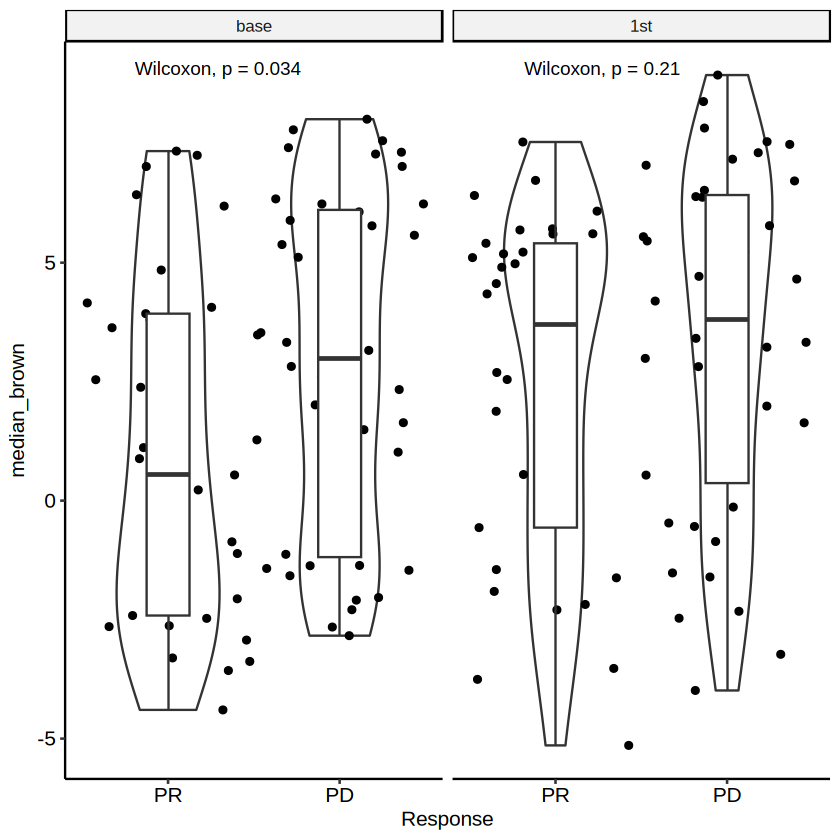

In [15]:
df_MEs %>% group_by(time, sample, Response) %>%
  mutate(time = factor(time, levels = c("base", "1st"))) %>%
  mutate(Response = factor(Response, levels = c("PR", "PD"))) %>%
  summarise(median_brown = median(brown)) %>%
  ggplot(aes(x = Response, y = median_brown)) +
    geom_violin(width = 0.6) +
    geom_jitter(position = position_jitter(width = 0.5)) +
    geom_boxplot(width = 0.25) +
    facet_wrap(~time) +
    stat_compare_means() +
    theme_pubr()

In [16]:
df_cov_base = read_table("/data/nfs_dell/project_HS/202310-sceqtl_v6/pseudobulk_pipeline/covariates/anno_l1_base_CD8.txt") 
df_cov_treat = read_table("/data/nfs_dell/project_HS/202310-sceqtl_v6/pseudobulk_pipeline/covariates/anno_l1_1st_CD8.txt") 
df_cov_base = df_cov_base %>% pivot_longer(cols = 2:ncol(.), names_to = "sample", values_to = "value") %>%
  pivot_wider(names_from = IID, values_from = value) %>%
  mutate(across(c("sex", paste0("PC", c(1:10)), paste0("V", c(3:5)), "age"), as.numeric)) %>%
  mutate(time = "base")

df_cov_treat = df_cov_treat %>% pivot_longer(cols = 2:ncol(.), names_to = "sample", values_to = "value") %>%
  pivot_wider(names_from = IID, values_from = value) %>%
  mutate(across(c("sex", paste0("PC", c(1:10)), paste0("V", c(3:5)), "age"), as.numeric))%>%
  mutate(time = "1st")

df_cov = rbind(df_cov_base, df_cov_treat)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.



In [17]:
library(doFuture)
registerDoFuture()
plan(multisession, workers = 12)

Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loading required package: future


Attaching package: ‘future’


The following objects are masked from ‘package:igraph’:

    %->%, %<-%


The following object is masked from ‘package:survival’:

    cluster




In [18]:
lm_results_base <- foreach(each_variant = target_variant, .packages = c("dplyr")) %dopar% {
  lm_res = df_geno %>% 
    filter(variant_id == each_variant) %>%
    left_join(., df_MEs_pseudobulk, by = "sample") %>%
    left_join(., df_cov, by =c("sample", "time")) %>%
    filter(time == "base") %>%
    lm(median_brown ~ allele + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + V3 + V4 + V5 + sex + age, data = .)
  return(lm_res)
}
lm_results_trt <- foreach(each_variant = target_variant, .packages = c("dplyr")) %dopar% {
  lm_res = df_geno %>% 
    filter(variant_id == each_variant) %>%
    left_join(., df_MEs_pseudobulk, by = "sample") %>%
    left_join(., df_cov, by =c("sample", "time")) %>%
    filter(time == "1st") %>%
    lm(median_brown ~ allele + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + V3 + V4 + V5 + sex + age, data = .)
  return(lm_res)
}
plan(sequential)

In [19]:
length(lm_results_base)

[1] 9507

In [20]:
summary(lm_results_base[[1]])


Call:
lm(formula = median_brown ~ allele + PC1 + PC2 + PC3 + PC4 + 
    PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + V3 + V4 + V5 + sex + 
    age, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9811 -0.8201 -0.1518  0.8916  3.2525 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.594692   2.376866  -1.933 0.058287 .  
allele        0.088430   0.273219   0.324 0.747402    
PC1          59.230386  16.497138   3.590 0.000696 ***
PC2          -7.874102   1.404278  -5.607 6.56e-07 ***
PC3          21.574063   1.469743  14.679  < 2e-16 ***
PC4         -11.115110   1.801378  -6.170 8.02e-08 ***
PC5           5.806794   1.593018   3.645 0.000586 ***
PC6          -9.014982   1.923222  -4.687 1.81e-05 ***
PC7          -0.473177   1.457433  -0.325 0.746645    
PC8           2.643961   1.498501   1.764 0.083118 .  
PC9           2.524360   1.424172   1.773 0.081749 .  
PC10          3.257345   1.501913   2.169 0.034360 *  
V3           -1.792637   

In [21]:
list_broom_base = lapply(lm_results_base, broom::glance)
names(list_broom_base) = target_variant
list_tidy_base = lapply(lm_results_base, broom::tidy)
names(list_tidy_base) = target_variant

In [22]:
list_broom_trt = lapply(lm_results_trt, broom::glance)
names(list_broom_trt) = target_variant
list_tidy_trt = lapply(lm_results_trt, broom::tidy)
names(list_tidy_trt) = target_variant

In [23]:
df_tidy_base = list_tidy_base %>% bind_rows(.id = "variant_id") %>% filter(term == "allele")
df_tidy_trt = list_tidy_trt %>% bind_rows(.id = "variant_id") %>% filter(term == "allele")

In [ ]:
df_map_cis %>% filter(grepl("base_CD8", condition)) %>%
  left_join(df_tidy_base) %>% arrange(p.value) %>% filter(lfsr < 0.05, p.value < 0.05) %>% arrange(lfsr) %>% head

In [ ]:
df_map_cis %>% filter(grepl("base_CD8", condition)) %>%
  left_join(df_tidy_base) %>%
  filter(lfsr < 0.05) %>%
  mutate(p.adj = p.adjust(p.value, method = "BH"))  %>%
  arrange(p.adj)

In [ ]:
df_map_cis %>% filter(grepl("base_CD8", condition)) %>%
  left_join(df_tidy_base) %>%
  filter(lfsr < 0.05)

In [ ]:
df_map_cis %>% filter(grepl("base_CD8", condition)) %>%
  left_join(df_tidy_base) %>%
  filter(lfsr < 0.05) %>%
  mutate(p.adj = p.adjust(p.value, method = "BH")) %>%
  ggplot(aes(x = slope, y = estimate)) +
    geom_point() +
    theme_pubr() + 
    stat_cor() 

ERROR: Error in df_map_cis %>% filter(grepl("base_CD8", condition)) %>% left_join(df_tidy_base) %>% : could not find function "%>%"


Joining with `by = join_by(variant_id)`


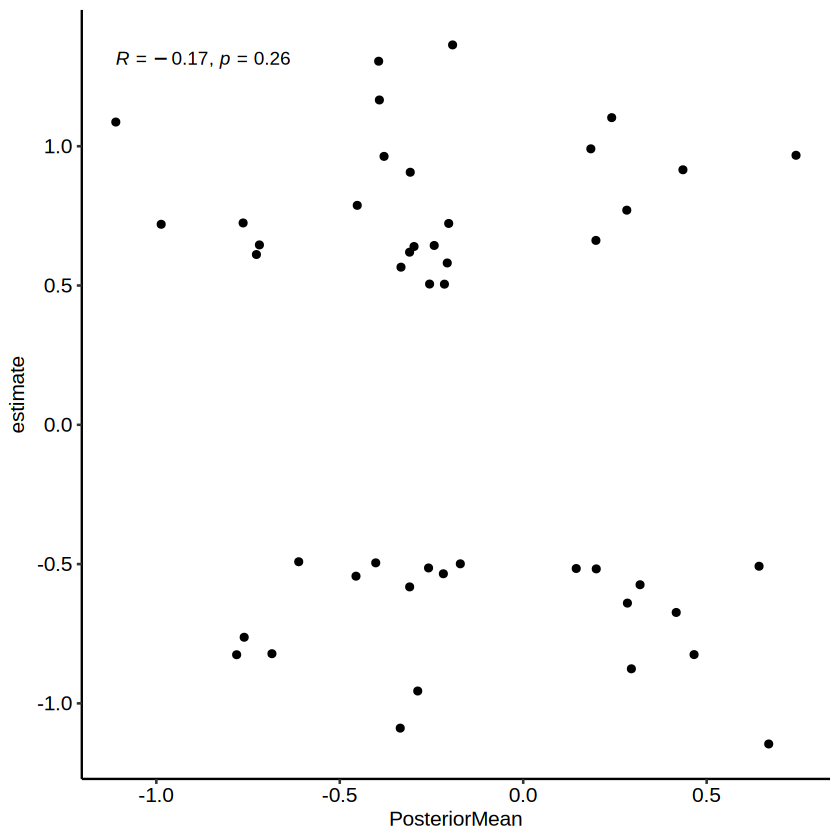

In [57]:
df_map_cis %>% filter(grepl("base_CD8", condition)) %>%
  left_join(df_tidy_base) %>%
  mutate(p.adj = p.adjust(p.value, method = "BH")) %>%
  filter(lfsr < 0.05, p.value < 0.05 ) %>% 
  ggplot(aes(x = PosteriorMean, y = estimate)) +
    geom_point() +
    theme_pubr() + 
    stat_cor() 

Joining with `by = join_by(variant_id)`


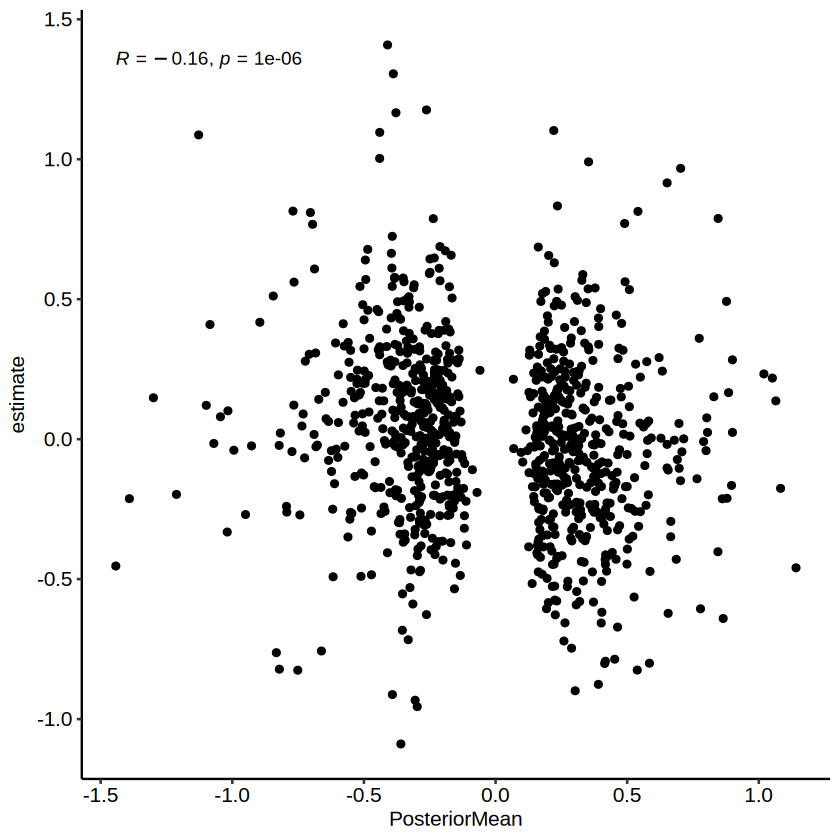

In [49]:
df_map_cis %>% filter(grepl("1st_CD8", condition)) %>%
  left_join(df_tidy_base) %>%
  mutate(p.adj = p.adjust(p.value, method = "BH")) %>%
  filter(lfsr < 0.05 ) %>% 
  ggplot(aes(x = PosteriorMean, y = estimate)) +
    geom_point() +
    theme_pubr() + 
    stat_cor() 

In [43]:
df_map_cis %>% filter(grepl("1st_CD8", condition)) %>%
  left_join(df_tidy_base) %>%
  left_join(df_gene_modulescore, by = c("phenotype_id" = "gene_name")) %>%
  filter(value > 0.3, color == "brown", p.value < 0.05) %>%
  select(10:20)

Joining with `by = join_by(variant_id)`


ma_count,pval_nominal,slope,slope_se,prefix_file,name,term,estimate,std.error,statistic,p.value
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
42,0.3564317,0.10014758,0.1071631,anno_l1_1st_CD8,EFHD2_chr1:15237518:T:A,allele,0.5387944,0.2331689,2.310747,0.02455339
52,0.1024152,-0.21746092,0.1296577,anno_l1_1st_CD8,ASCL2_chr11:2734116:A:G,allele,0.5776869,0.2463261,2.345212,0.02258508
39,0.9174844,-0.01505749,0.1442929,anno_l1_1st_CD8,ABI3_chr17:50042791:A:G,allele,0.6353915,0.2751856,2.308956,0.02465974


In [14]:
df_map_cis %>% arrange(lfsr) %>% 
  filter(grepl("CD8", condition), phenotype_id %in% c_brown, lfsr < 0.05) %>%
  left_join(df_gene_modulescore, by = c("phenotype_id" = "gene_name")) %>%
  filter(value > 0.5) %>%
  arrange(-value) 

phenotype_id,variant_id,condition,lfsr,PosteriorMean,PosteriorSD,start_distance,af,ma_samples,ma_count,pval_nominal,slope,slope_se,prefix_file,name,color,value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
GZMH,chr14:24702444:T:C,anno_l1_1st_CD8,1.662423e-02,-0.18113661,0.08260264,92745,0.21232876,28,31,1.510541e-01,-0.1608977,0.10960881,anno_l1_1st_CD8,GZMH_chr14:24702444:T:C,brown,0.8776770
PRF1,chr10:69735970:T:G,anno_l1_base_CD8,1.641491e-03,-0.23437770,0.06918603,-866789,0.48630136,51,71,3.104559e-05,-0.3282128,0.06892703,anno_l1_base_CD8,PRF1_chr10:69735970:T:G,brown,0.7786047
GZMB,chr14:25054443:G:A,anno_l1_1st_CD8,1.964842e-02,-0.21060884,0.10750558,420176,0.24657534,32,36,1.632731e-01,-0.2034576,0.14286761,anno_l1_1st_CD8,GZMB_chr14:25054443:G:A,brown,0.7752229
FGFBP2,chr4:15967286:T:G,anno_l1_1st_CD8,1.384532e-02,-0.17435370,0.08249012,-2023,0.28082192,36,41,1.598500e-01,-0.1929838,0.13437974,anno_l1_1st_CD8,FGFBP2_chr4:15967286:T:G,brown,0.7745047
PLEK,chr2:68400136:G:A,anno_l1_1st_CD8,3.767953e-06,-0.50536764,0.12412793,34854,0.23287672,30,34,3.344425e-04,-0.5427314,0.13649520,anno_l1_1st_CD8,PLEK_chr2:68400136:G:A,brown,0.6789833
PLEK,chr2:68400136:G:A,anno_l1_base_CD8,4.819690e-04,-0.34326799,0.10252254,34854,0.23287672,30,34,4.687255e-03,-0.3633258,0.12050005,anno_l1_base_CD8,PLEK_chr2:68400136:G:A,brown,0.6789833
HLA-C,chr6:31299841:A:G,anno_l1_1st_CD8,6.584726e-11,0.50499364,0.07646057,27711,0.23972602,31,35,9.957161e-07,0.6083001,0.10282031,anno_l1_1st_CD8,HLA-C_chr6:31299841:A:G,brown,0.6789025
HLA-C,chr6:31299841:A:G,anno_l1_base_CD8,7.149257e-09,0.48353362,0.06989233,27711,0.23972602,31,35,1.594933e-05,0.5432719,0.10908120,anno_l1_base_CD8,HLA-C_chr6:31299841:A:G,brown,0.6789025
B2M,chr15:43986800:G:GT,anno_l1_base_CD8,3.090838e-02,0.08484327,0.04659903,-724558,0.09589041,14,14,1.147587e-01,0.1056914,0.06539061,anno_l1_base_CD8,B2M_chr15:43986800:G:GT,brown,0.6785125


In [25]:
df_map_cis %>% filter(phenotype_id == "CD244")

phenotype_id,variant_id,condition,lfsr,PosteriorMean,PosteriorSD,start_distance,af,ma_samples,ma_count,pval_nominal,slope,slope_se,prefix_file,name
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
CD244,chr1:161784413:G:GAT,anno_l1_1st_CD8,0.226329812,-0.09188988,0.12693097,921526,0.1506849,17,22,9.151981e-01,-0.01870595,0.1744042,anno_l1_1st_CD8,CD244_chr1:161784413:G:GAT
CD244,chr1:161784413:G:GAT,anno_l1_1st_Mono,0.275725127,0.09008366,0.14121881,921526,0.1506849,17,22,1.476529e-01,0.27657974,0.1867992,anno_l1_1st_Mono,CD244_chr1:161784413:G:GAT
CD244,chr1:161784413:G:GAT,anno_l1_1st_NK,0.176185423,-0.11502780,0.12807380,921526,0.1506849,17,22,3.486580e-01,-0.20445555,0.2152306,anno_l1_1st_NK,CD244_chr1:161784413:G:GAT
CD244,chr1:161784413:G:GAT,anno_l1_base_CD8,0.004770485,-0.56569321,0.22502087,921526,0.1506849,17,22,1.657513e-05,-0.92118931,0.1854308,anno_l1_base_CD8,CD244_chr1:161784413:G:GAT
CD244,chr1:161784413:G:GAT,anno_l1_base_Mono,0.484245333,0.01008276,0.12769753,921526,0.1506849,17,22,8.879716e-01,0.02873120,0.2025139,anno_l1_base_Mono,CD244_chr1:161784413:G:GAT
CD244,chr1:161784413:G:GAT,anno_l1_base_NK,0.006897971,-0.39415362,0.16786541,921526,0.1506849,17,22,2.296743e-03,-0.53779525,0.1638646,anno_l1_base_NK,CD244_chr1:161784413:G:GAT
CD244,chr1:161784413:G:GAT,anno_l1_base_Other_T,0.360265282,-0.02778451,0.08882412,921526,0.1506849,17,22,2.064266e-01,-0.25643045,0.1992998,anno_l1_base_Other_T,CD244_chr1:161784413:G:GAT


In [15]:
df_GWAS_like = left_join(df_geno, df_md_subset) %>% distinct(sample, variant_id, allele, Response)

Joining with `by = join_by(sample)`


Warning message in left_join(df_geno, df_md_subset):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1821 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


Joining with `by = join_by(sample)`
Joining with `by = join_by(CellID)`


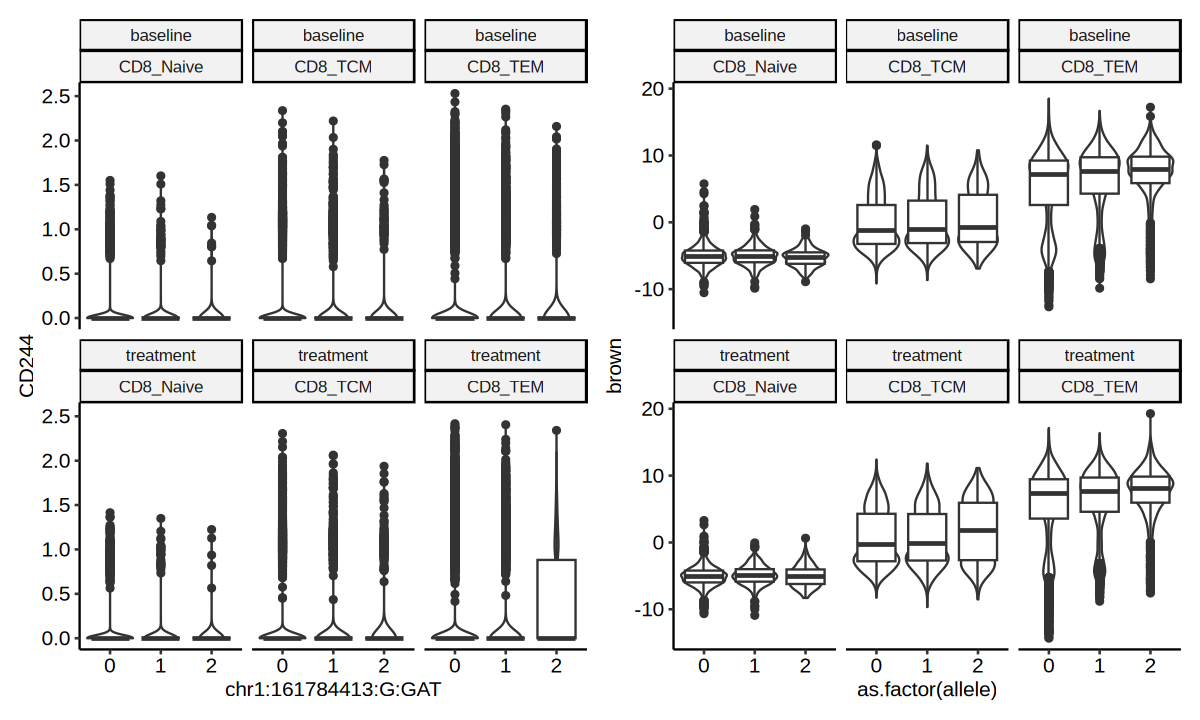

`summarise()` has grouped output by 'allele'. You can override using the
`.groups` argument.


,PD
,<int>
0,56
1,12
2,5


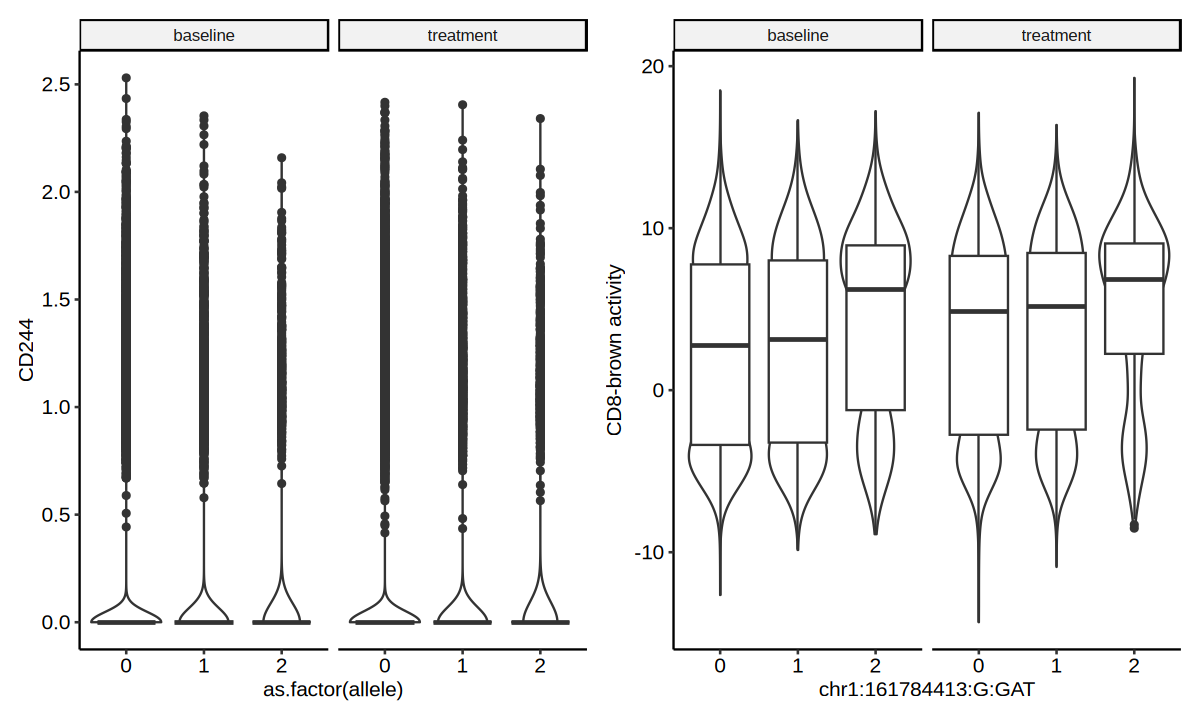

In [28]:
options(repr.plot.width = 10, repr.plot.height = 6)
c_gene_name= "CD244"
variant_name = df_map_cis %>% filter(phenotype_id == c_gene_name) %>% distinct(variant_id) %>% pull()
  
df_each_GE = dgc_GE[c_gene_name,] %>% as.data.frame() %>%
  rownames_to_column("CellID")
colnames(df_each_GE) = c("CellID", c_gene_name)
df_plot_geno_ME_GE = df_geno %>% 
  filter(variant_id == variant_name) %>% 
  left_join(df_MEs) %>%
  left_join(df_each_GE) %>%
  mutate(time = factor(ifelse(time == "base", "baseline", "treatment"), levels = c("baseline", "treatment")),
  Response = factor(ifelse(Response == "PD", "NCB", "DCB"), levels = c("DCB", "NCB"))) 


p1 = df_plot_geno_ME_GE  %>% ggplot(aes(x = as.factor(allele), y = .data[[c_gene_name]])) + 
  geom_violin() + 
  geom_boxplot()+
  facet_wrap(~time + anno_l2) +
  xlab("chr1:161784413:G:GAT")+
  theme_pubr()
p2 = df_plot_geno_ME_GE  %>% ggplot(aes(x = as.factor(allele), y = brown)) + 
  geom_violin() + 
  geom_boxplot()+
  facet_wrap(~time + anno_l2) +
  theme_pubr()

p1+ p2


p3 = df_plot_geno_ME_GE  %>% ggplot(aes(x = as.factor(allele), y = .data[[c_gene_name]])) + 
  geom_violin() + 
  geom_boxplot()+
  facet_wrap(~time) +
  theme_pubr()
p4 = df_plot_geno_ME_GE  %>% ggplot(aes(x = as.factor(allele), y = brown)) + 
  geom_violin() + 
  geom_boxplot()+
  facet_wrap(~time) +
  xlab("chr1:161784413:G:GAT")+
  ylab("CD8-brown activity") +
  theme_pubr()

p3 +p4

df_plot_geno_ME_GE %>% distinct(sample, allele, Response) %>%
  mutate(Response = ifelse(as.character(Response) == "PR", "PR", "PD")) %>%
  group_by(allele, Response) %>%
  summarise(n = n()) %>%
  pivot_wider(names_from = Response, values_from = n) %>%
  as.data.frame() %>%
  column_to_rownames("allele")



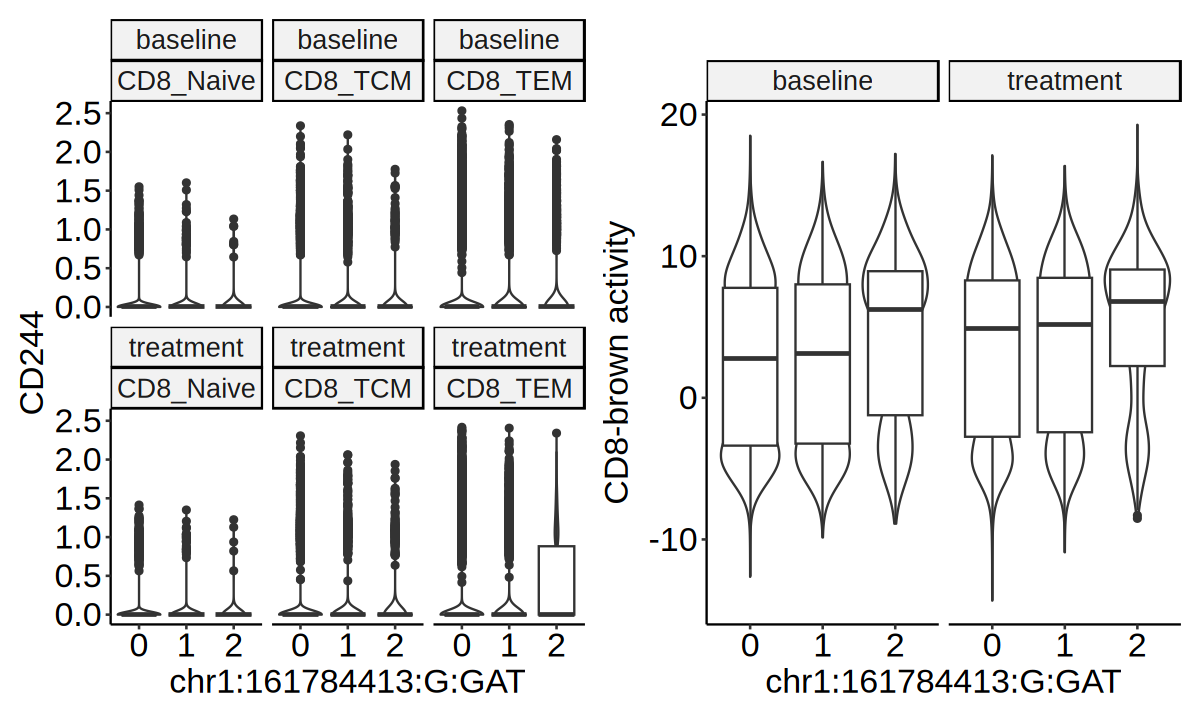

In [29]:
p1 + p4 & theme(text = element_text(size = 20))

In [28]:
library(lmerTest)

In [ ]:
df_plot_geno_ME_GE_base =  df_plot_geno_ME_GE %>% filter(time == "base")
lmer(brown~ allele + (1|sample), data = df_plot_geno_ME_GE_base) %>% summary()

df_plot_geno_ME_GE_base =  df_plot_geno_ME_GE %>% filter(time == "1st")
lmer(brown~ allele + file + (1|sample), data = df_plot_geno_ME_GE_base) %>% summary()

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: brown ~ allele + (1 | sample)
   Data: df_plot_geno_ME_GE_base

REML criterion at convergence: 242786.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.84082 -0.83738  0.04445  0.80514  3.02312 

Random effects:
 Groups   Name        Variance Std.Dev.
 sample   (Intercept)  5.326   2.308   
 Residual             30.682   5.539   
Number of obs: 38723, groups:  sample, 73

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   2.4121     0.3521 70.8282   6.851 2.22e-09 ***
allele       -0.4837     0.4535 70.8573  -1.067     0.29    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
       (Intr)
allele -0.635

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: brown ~ allele + (1 | sample)
   Data: df_plot_geno_ME_GE_base

REML criterion at convergence: 244556.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1120 -0.8369  0.1418  0.7765  3.2353 

Random effects:
 Groups   Name        Variance Std.Dev.
 sample   (Intercept)  6.486   2.547   
 Residual             28.955   5.381   
Number of obs: 39367, groups:  sample, 73

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   2.7450     0.3880 70.9528   7.075 8.59e-10 ***
allele       -0.1329     0.4998 70.9580  -0.266    0.791    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
       (Intr)
allele -0.635

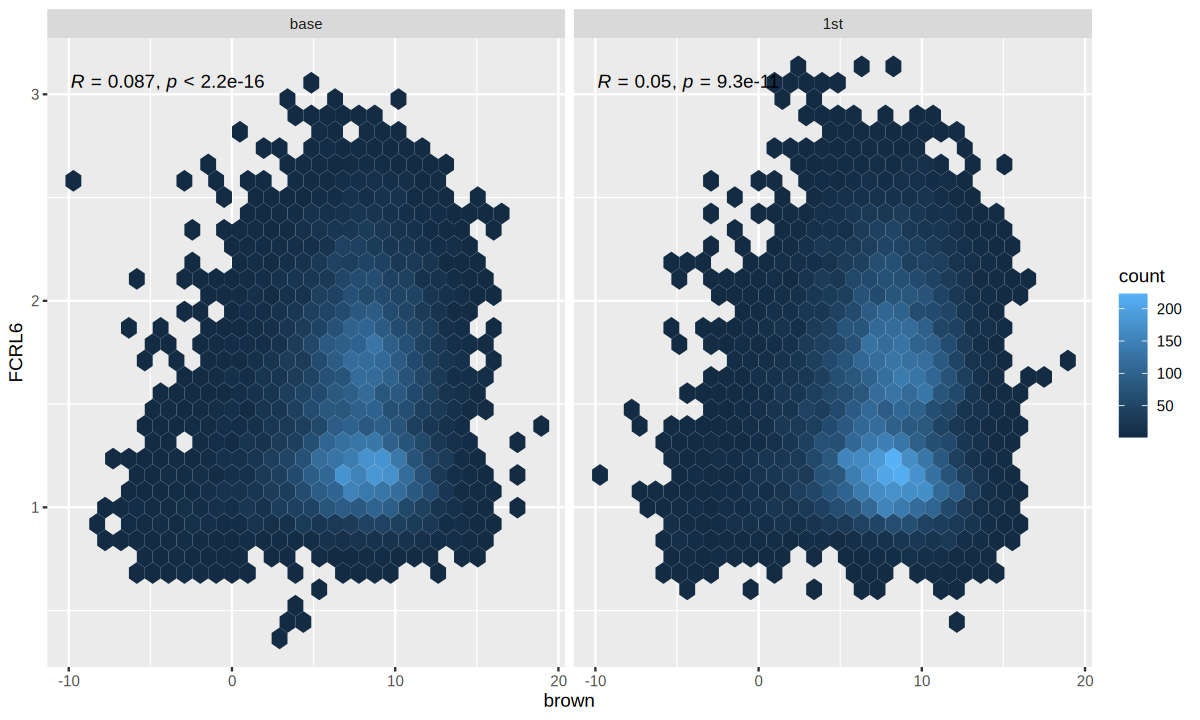

In [ ]:
df_plot_geno_ME_GE %>%
  filter(.data[[c_gene_name]] > 0 ) %>%
  ggplot(aes(x = brown, y = .data[[c_gene_name]])) +
    geom_hex() + stat_cor() + facet_wrap(~time)

`summarise()` has grouped output by 'allele'. You can override using the
`.groups` argument.


,PD,PR
,<int>,<int>
0,19,18
1,16,15
2,5,NA


Joining with `by = join_by(CellID, sample, time, anno_l2, Response)`
`geom_smooth()` using formula = 'y ~ x'


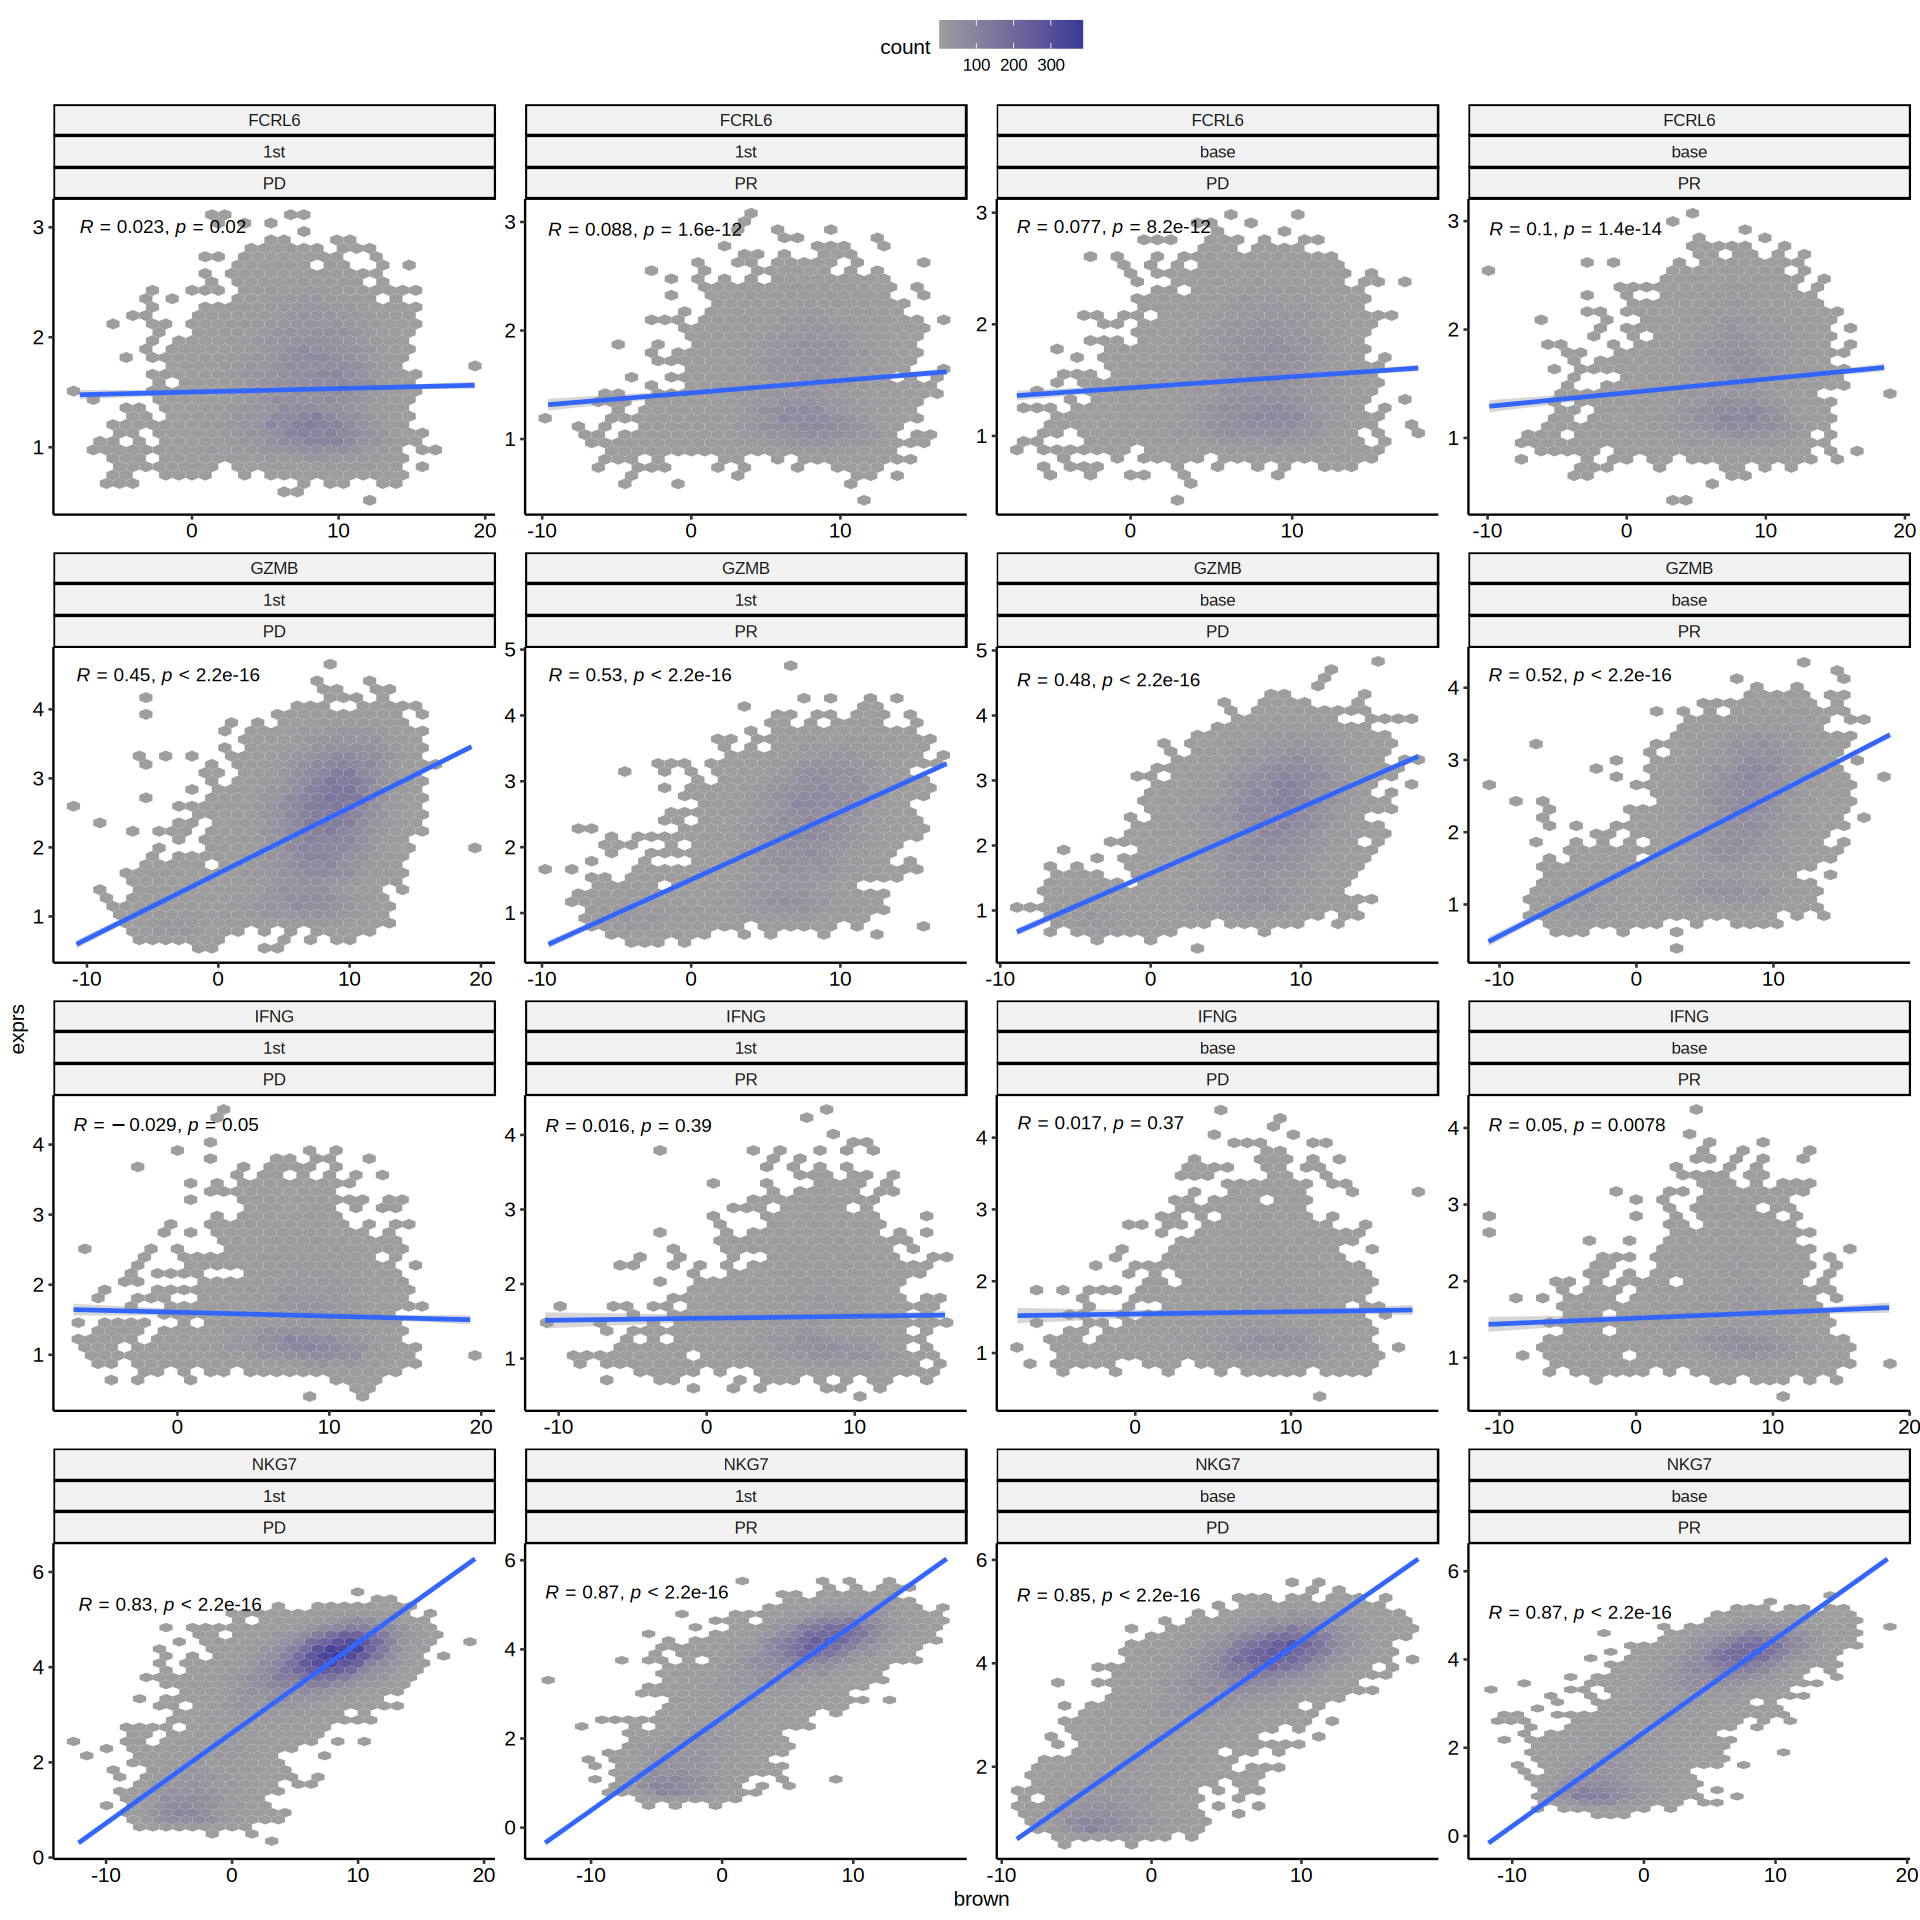

In [92]:
options(repr.plot.width = 16, repr.plot.height = 16)
left_join(df_md_subset, df_gene, by = "CellID") %>%
mutate(time = factor(time, levels = c("base", "1st"))) %>%
left_join(df_MEs) %>%
  dplyr::select(all_of(c_genes[1]):blue, anno_l1, anno_l2, time, Response) %>%
  pivot_longer(cols = all_of(c_genes), names_to = "gene", values_to = "exprs") %>%
  filter(exprs > 0) %>%
  ggplot(aes(x = brown, y = exprs)) + 
    geom_hex() +
    scale_fill_gradient2(mid = 40)+
    facet_wrap(~gene + time + Response, scales = "free") + 
    geom_smooth(method = "lm")+
    stat_cor()+
    theme_pubr()

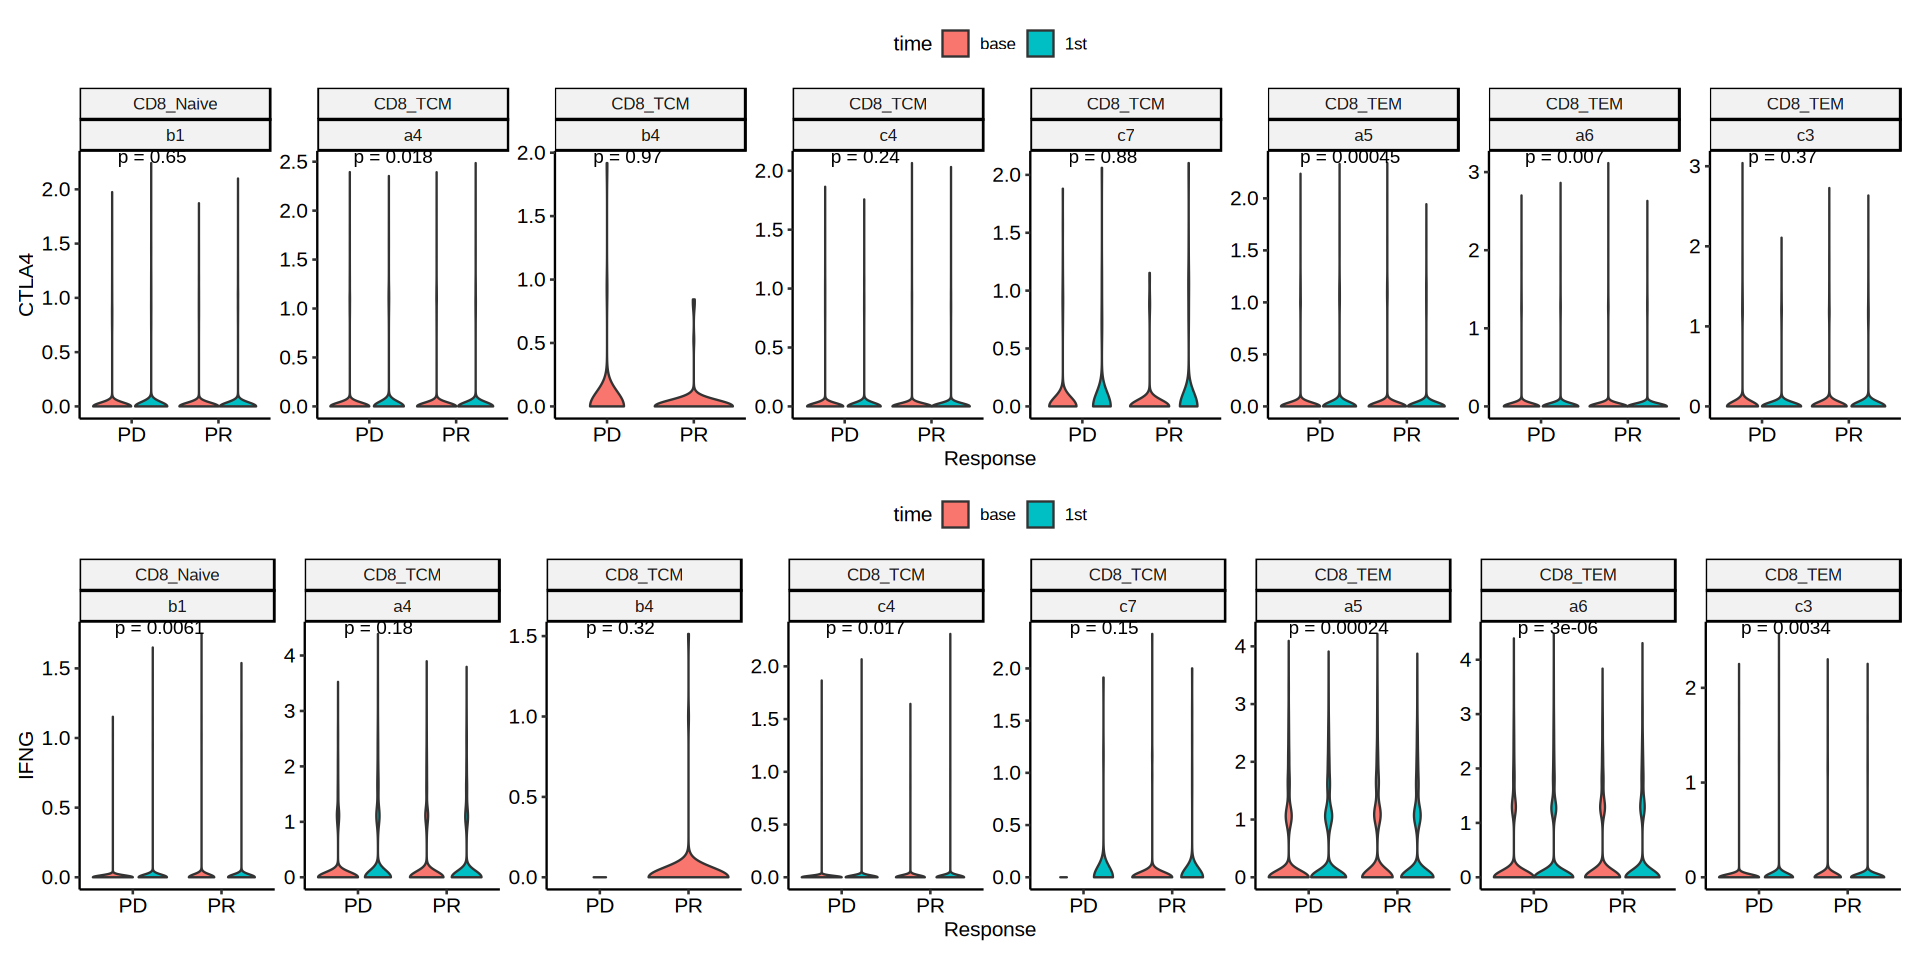

In [65]:
options(repr.plot.width = 16, repr.plot.height = 8)
p1 = left_join(df_md_subset, df_gene, by = "CellID") %>%
  mutate(time = factor(time, levels = c("base", "1st"))) %>%
  group_by(time, Response) %>%
  ggplot(aes(x = Response, y = CTLA4)) + geom_violin(aes(fill = time)) +
  facet_wrap(~anno_l2 + anno_c1, scales = "free", ncol = 8) +
  stat_compare_means(
     aes(label = paste0("p = ", after_stat(p.format)))
  )+
  theme_pubr()

p2 = left_join(df_md_subset, df_gene, by = "CellID") %>%
  mutate(time = factor(time, levels = c("base", "1st"))) %>%
  group_by(time, Response) %>%
  ggplot(aes(x = Response, y =IFNG)) + geom_violin(aes(fill = time)) +
  facet_wrap(~anno_l2 + anno_c1, scales = "free", ncol = 8) +
  stat_compare_means(
     aes(label = paste0("p = ", after_stat(p.format)))
  )+
  theme_pubr()
p1/p2

In [ ]:
df_brown= df_gene_modulescore %>% filter(color == "brown") 

In [106]:
df_map_cis %>% filter(grepl("CD8", condition)) %>%
  filter(lfsr < 0.05) %>%
  left_join(., df_brown, by = c("phenotype_id" = "gene_name")) %>%
  arrange(-value)

phenotype_id,variant_id,condition,lfsr,PosteriorMean,PosteriorSD,start_distance,af,ma_samples,ma_count,pval_nominal,slope,slope_se,prefix_file,name,color,value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
GZMH,chr14:24702444:T:C,anno_l1_1st_CD8,1.662423e-02,-0.18113661,0.08260264,92745,0.21232876,28,31,1.510541e-01,-0.1608977,0.10960881,anno_l1_1st_CD8,GZMH_chr14:24702444:T:C,brown,0.8776770
PRF1,chr10:69735970:T:G,anno_l1_base_CD8,1.641491e-03,-0.23437770,0.06918603,-866789,0.48630136,51,71,3.104559e-05,-0.3282128,0.06892703,anno_l1_base_CD8,PRF1_chr10:69735970:T:G,brown,0.7786047
GZMB,chr14:25054443:G:A,anno_l1_1st_CD8,1.964842e-02,-0.21060884,0.10750558,420176,0.24657534,32,36,1.632731e-01,-0.2034576,0.14286761,anno_l1_1st_CD8,GZMB_chr14:25054443:G:A,brown,0.7752229
FGFBP2,chr4:15967286:T:G,anno_l1_1st_CD8,1.384532e-02,-0.17435370,0.08249012,-2023,0.28082192,36,41,1.598500e-01,-0.1929838,0.13437974,anno_l1_1st_CD8,FGFBP2_chr4:15967286:T:G,brown,0.7745047
PLEK,chr2:68400136:G:A,anno_l1_1st_CD8,3.767953e-06,-0.50536764,0.12412793,34854,0.23287672,30,34,3.344425e-04,-0.5427314,0.13649520,anno_l1_1st_CD8,PLEK_chr2:68400136:G:A,brown,0.6789833
PLEK,chr2:68400136:G:A,anno_l1_base_CD8,4.819690e-04,-0.34326799,0.10252254,34854,0.23287672,30,34,4.687255e-03,-0.3633258,0.12050005,anno_l1_base_CD8,PLEK_chr2:68400136:G:A,brown,0.6789833
HLA-C,chr6:31299841:A:G,anno_l1_1st_CD8,6.584726e-11,0.50499364,0.07646057,27711,0.23972602,31,35,9.957161e-07,0.6083001,0.10282031,anno_l1_1st_CD8,HLA-C_chr6:31299841:A:G,brown,0.6789025
HLA-C,chr6:31299841:A:G,anno_l1_base_CD8,7.149257e-09,0.48353362,0.06989233,27711,0.23972602,31,35,1.594933e-05,0.5432719,0.10908120,anno_l1_base_CD8,HLA-C_chr6:31299841:A:G,brown,0.6789025
B2M,chr15:43986800:G:GT,anno_l1_base_CD8,3.090838e-02,0.08484327,0.04659903,-724558,0.09589041,14,14,1.147587e-01,0.1056914,0.06539061,anno_l1_base_CD8,B2M_chr15:43986800:G:GT,brown,0.6785125
